# Read from Synthoseis volumes

In [1]:
import numpy as np
import xarray as xr
from pathlib import Path
import dask.array as da

In [2]:
path_to_seismic = Path("C:\scratch\synthoseis_example\seismic__2023.67327713_example\seismicCubes_RFC_fullstack_2023.67327713.npy")

Use xarray

In [3]:
seismic_da = da.from_array(np.load(path_to_seismic))

In [5]:
xarray_seismic_data = xr.DataArray(
    data=seismic_da,
    name="seismic",
    dims=["iline", "xline", "twt"],
    coords={
        "iline": np.arange(0, seismic_da.shape[0]),
        "xline": np.arange(0, seismic_da.shape[1]),
        "twt": np.arange(0, seismic_da.shape[2])
    }
  )

In [6]:
xarray_seismic_data

<xarray.DataArray 'seismic' (iline: 300, xline: 300, twt: 1259)>
dask.array<array, shape=(300, 300, 1259), dtype=float64, chunksize=(255, 255, 255), chunktype=numpy.ndarray>
Coordinates:
  * iline    (iline) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * xline    (xline) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * twt      (twt) int32 0 1 2 3 4 5 6 7 ... 1252 1253 1254 1255 1256 1257 1258

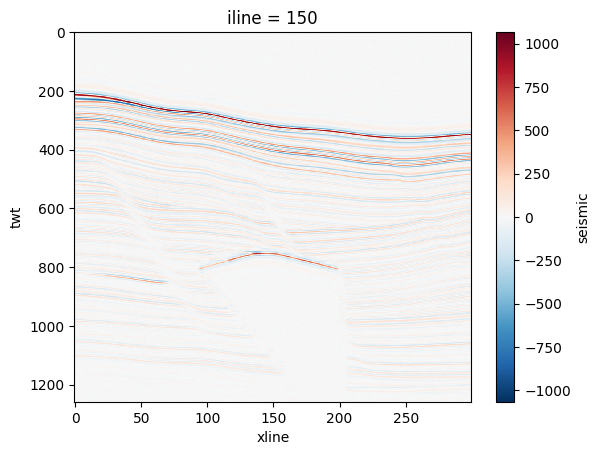

In [10]:
xarray_seismic_data.isel(iline=150).T.plot(yincrease=False)

# Store as a zarr

In [11]:
storage_future = xarray_seismic_data.to_zarr(
    store=path_to_seismic.parent / "seismic.zarr",
    compute=False
)

In [13]:
from dask.diagnostics import ProgressBar

In [14]:
with ProgressBar():
  storage_future.compute()

[########################################] | 100% Completed | 1.08 sms
